In this project, we are going to analyze the PS4 game market

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
Project = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')
Project.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [4]:
Project.shape

(1034, 9)

In [5]:
Project.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

It is noticed that it has many null fields. It would be better to exclude these fields so that the result of our project is not corrupted

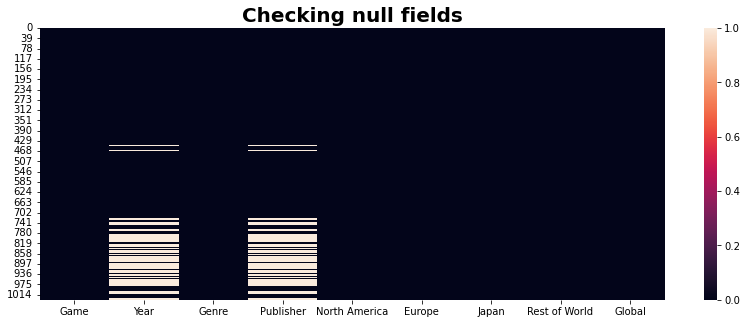

In [6]:
plt.figure(figsize=(14, 5))
sns.heatmap(Project.isnull())
plt.title('Checking null fields', fontsize=20, fontweight=600);

In [7]:
Project = Project.dropna()

In [8]:
Project.shape

(825, 9)

In [9]:
Project.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [10]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           825 non-null    object 
 1   Year           825 non-null    float64
 2   Genre          825 non-null    object 
 3   Publisher      825 non-null    object 
 4   North America  825 non-null    float64
 5   Europe         825 non-null    float64
 6   Japan          825 non-null    float64
 7   Rest of World  825 non-null    float64
 8   Global         825 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.5+ KB


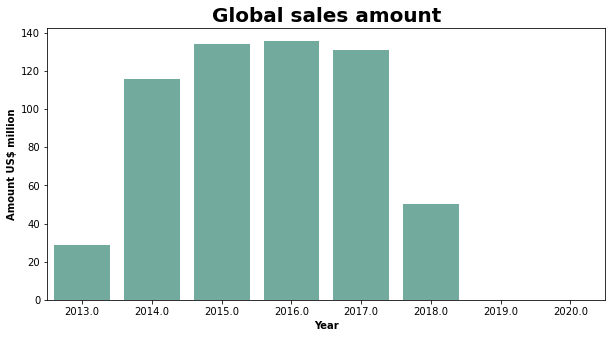

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Global sales amount', fontsize=20, fontweight=600)
sns.barplot(data = Project, x= 'Year', y='Global', ci=None, color='#69b3a2', estimator = sum)
plt.ylabel('Amount US$ million', fontweight=600, color='black')
plt.xlabel('Year', fontweight=600, color='black');

Knowing that some null fields were excluded, we noticed that the 2019 and 2020 columns were empty. 
So, let's delete them and keep the others.

In [12]:
Project = Project.loc[(Project['Year'] != 2019) & (Project['Year'] != 2020)]

In [13]:
Project['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

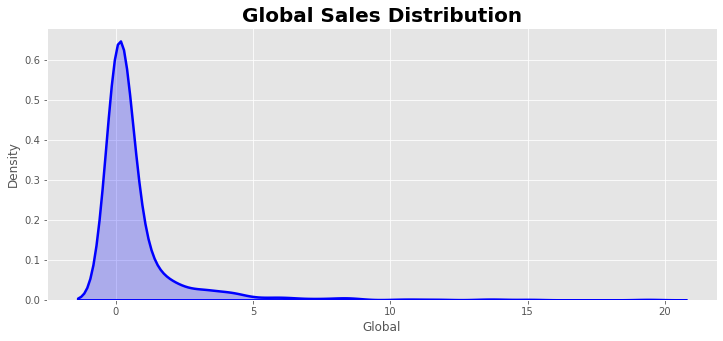

In [14]:
plt.figure( figsize=(12, 5) )
plt.style.use('ggplot')
plt.title('Global Sales Distribution', fontsize=20, fontweight=600 )

sns.kdeplot(Project['Global'], shade=True, linewidth=2.5, color='blue' );

In [15]:
Group_analyse = Project.groupby( by=['Year'] ).sum().reset_index()
Group_analyse

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


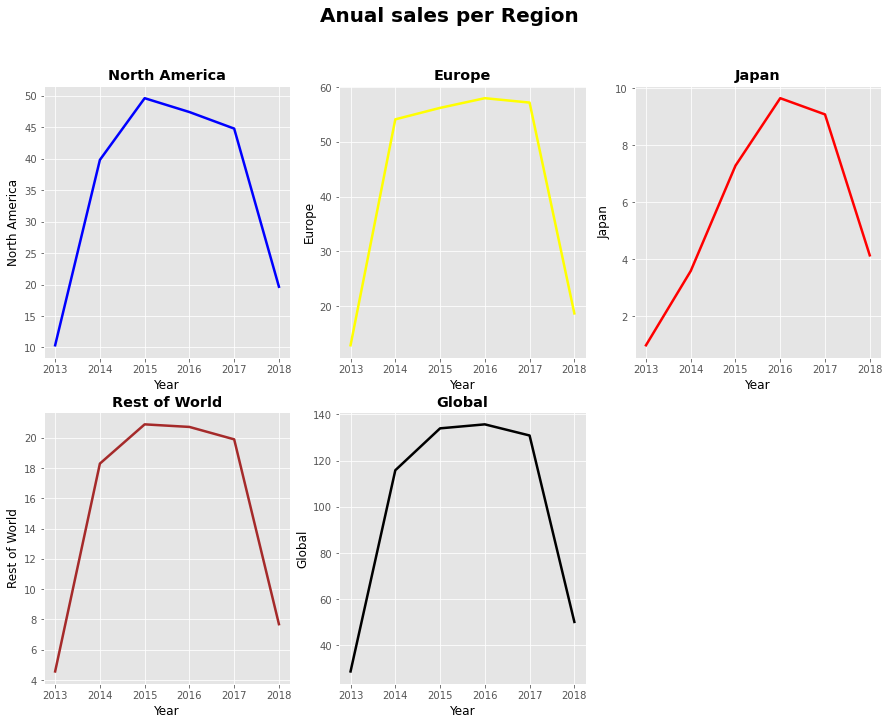

In [16]:
plt.subplots( figsize=(15, 11) )
plt.suptitle('Anual sales per Region', fontsize=20, fontweight=600)

plt.subplot( 2, 3, 1 )
plt.plot( Group_analyse['Year'], Group_analyse['North America'], color='blue', linewidth=2.5 )
plt.title('North America', fontweight=600)
plt.xlabel('Year', color='black')
plt.ylabel('North America', color='black')


plt.subplot( 2, 3, 2 )
plt.plot( Group_analyse['Year'], Group_analyse['Europe'], color='yellow', linewidth=2.5 )
plt.title('Europe', fontweight=600)
plt.xlabel('Year', color='black')
plt.ylabel('Europe', color='black')

plt.subplot( 2, 3, 3 )
plt.plot( Group_analyse['Year'], Group_analyse['Japan'], color='red', linewidth=2.5 )
plt.title('Japan', fontweight=600)
plt.xlabel('Year', color='black')
plt.ylabel('Japan', color='black')

plt.subplot( 2, 3, 4 )
plt.plot( Group_analyse['Year'], Group_analyse['Rest of World'], color='brown', linewidth=2.5 )
plt.title('Rest of World', fontweight=600)
plt.xlabel('Year', color='black')
plt.ylabel('Rest of World', color='black')

plt.subplot( 2, 3, 5 )
plt.plot( Group_analyse['Year'], Group_analyse['Global'], color='black', linewidth=2.5 )
plt.title('Global', fontweight=600)
plt.xlabel('Year', color='black')
plt.ylabel('Global', color='black');

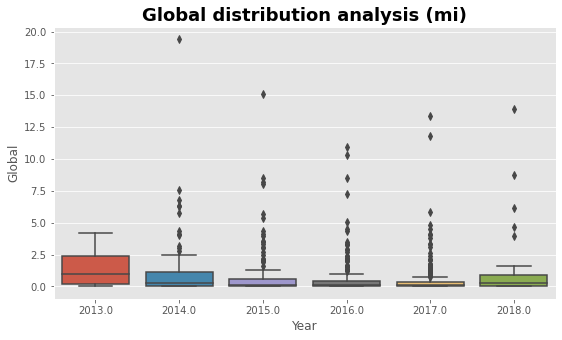

In [17]:
plt.figure(figsize=(9, 5))
plt.title('Global distribution analysis (mi)', fontsize=18, fontweight=600)
sns.boxplot(data=Project, x='Year', y='Global');

In [18]:
Best_Sellers = Project.loc[ Project['Global'] >= 10 ]
Best_Sellers

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


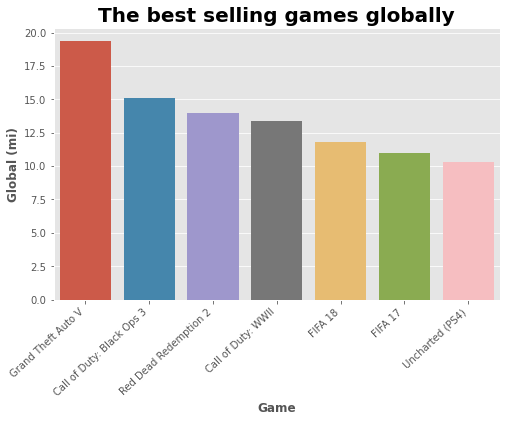

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data= Best_Sellers, x='Game', y='Global')
plt.title('The best selling games globally', fontsize=20, fontweight= 600)
plt.xticks(rotation=43, ha='right')
plt.ylabel('Global (mi)', fontweight=600)
plt.xlabel('Game', fontweight=600);

In [20]:
Group_analyse

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


Analyzing the proportion of 100% of each continent compared to the global value

In [21]:
America = [(America / Total) * 100 for America, Total in zip(Group_analyse['North America'], Group_analyse['Global'])]
Europe = [(Europe/Total) * 100 for Europe, Total in zip(Group_analyse['Europe'], Group_analyse['Global'])]
Japan = [(Japan/Total) * 100 for Japan, Total in zip(Group_analyse['Japan'], Group_analyse['Global'])]
World = [(World/Total) * 100 for World, Total in zip(Group_analyse['Rest of World'], Group_analyse['Global'])]

In [22]:
America, Europe, Japan, World

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

Bar width: Largura da barra
Groups: the number of years expressed in number

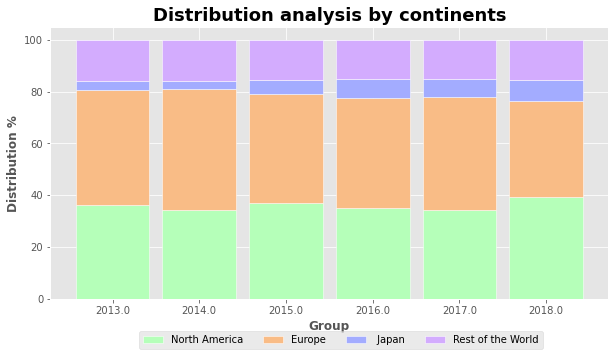

In [23]:
plt.figure( figsize=(10, 5) )

# Bar width
Bar_width = 0.85
Rotulos = Group_analyse['Year']
Groups = [0, 1, 2, 3, 4, 5]

plt.title('Distribution analysis by continents', fontsize= 18, fontweight=600)

# Plot da America
plt.bar(Groups, America, width=Bar_width, color='#b5ffb9', edgecolor='white' )

# Plot of Europe
plt.bar(Groups, Europe, bottom=America, width=Bar_width, color='#f9bc86', edgecolor='white' )

# Plot of Japan
plt.bar(Groups, Japan, bottom=[ A + B for A, B in zip(America, Europe) ], width=Bar_width,
        color='#a3acff', edgecolor='white' )

# Plot of the rest of the world
plt.bar(Groups, World, bottom=[ A + B + C for A, B, C in zip(America, Europe, Japan) ], width=Bar_width,
        color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Groups, Rotulos )
plt.xlabel('Group', fontweight=600)
plt.ylabel('Distribution %', fontweight=600)

# Legenda
plt.legend( ['North America', 'Europe',' Japan', 'Rest of the World'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

In [24]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Project['Publisher Number'] = Funcao_Label.fit_transform( Project['Publisher'] )
Project['Genre Number'] = Funcao_Label.fit_transform( Project['Genre'] )
Project['Game Number'] = Funcao_Label.fit_transform( Project['Game'] )

Project.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Publisher Number,Genre Number,Game Number
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


The columns Publisher number, Genre number and Game  number were created and transformed into numeric to facilitate their analysis

In [25]:
Color = sns.color_palette('husl', 8)
Color

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

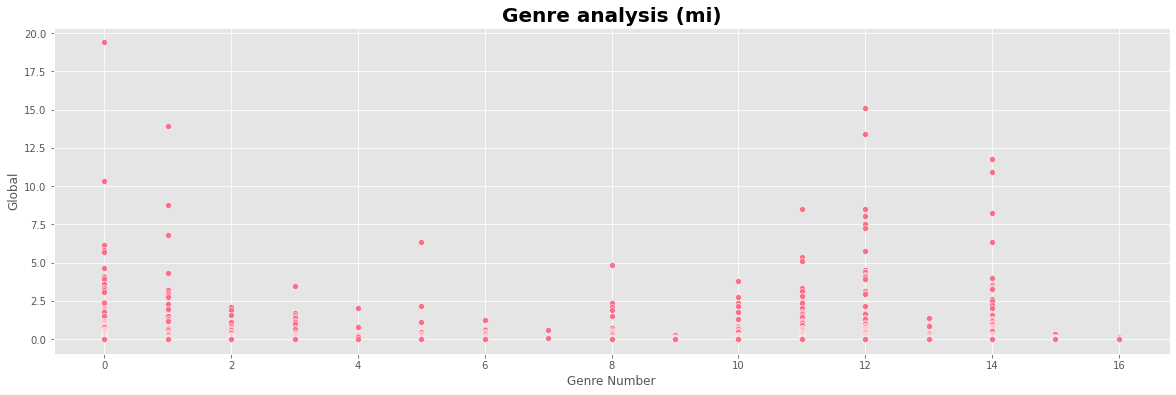

In [26]:
plt.figure( figsize=(20,6))
plt.title('Genre analysis (mi)', fontsize=20, fontweight=600)
sns.scatterplot(data=Project, x='Genre Number', y='Global', color=Color[0]);

Global sales analysis from the numeric Genre Number column

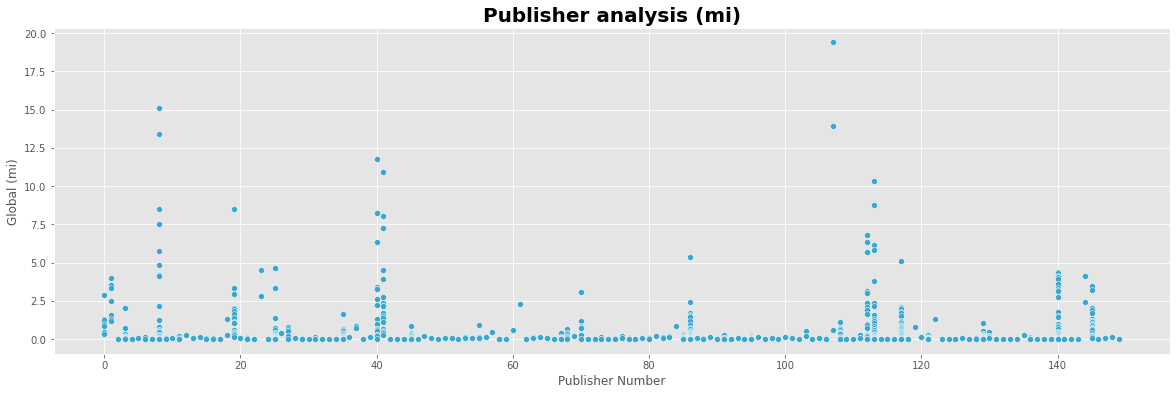

In [27]:
plt.figure( figsize=(20,6))
plt.title('Publisher analysis (mi)', fontsize=20, fontweight=600)
sns.scatterplot(data=Project, x='Publisher Number', y='Global', color=Color[5])
plt.ylabel('Global (mi)');

Global sales analysis from the numeric Publisher Number column

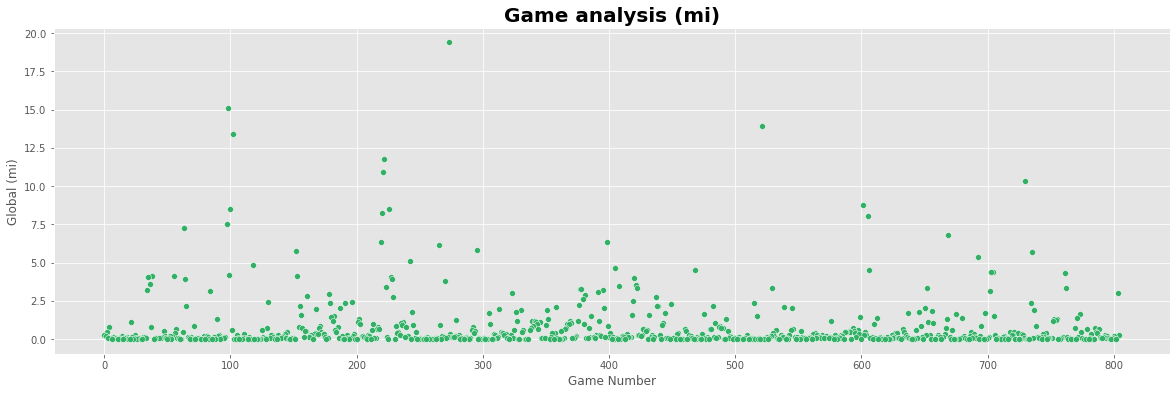

In [28]:
plt.figure( figsize=(20,6))
plt.title('Game analysis (mi)', fontsize=20, fontweight=600)
sns.scatterplot(data=Project, x='Game Number', y='Global', color=Color[3])
plt.ylabel('Global (mi)');

Global sales analysis from the numeric Game Number column

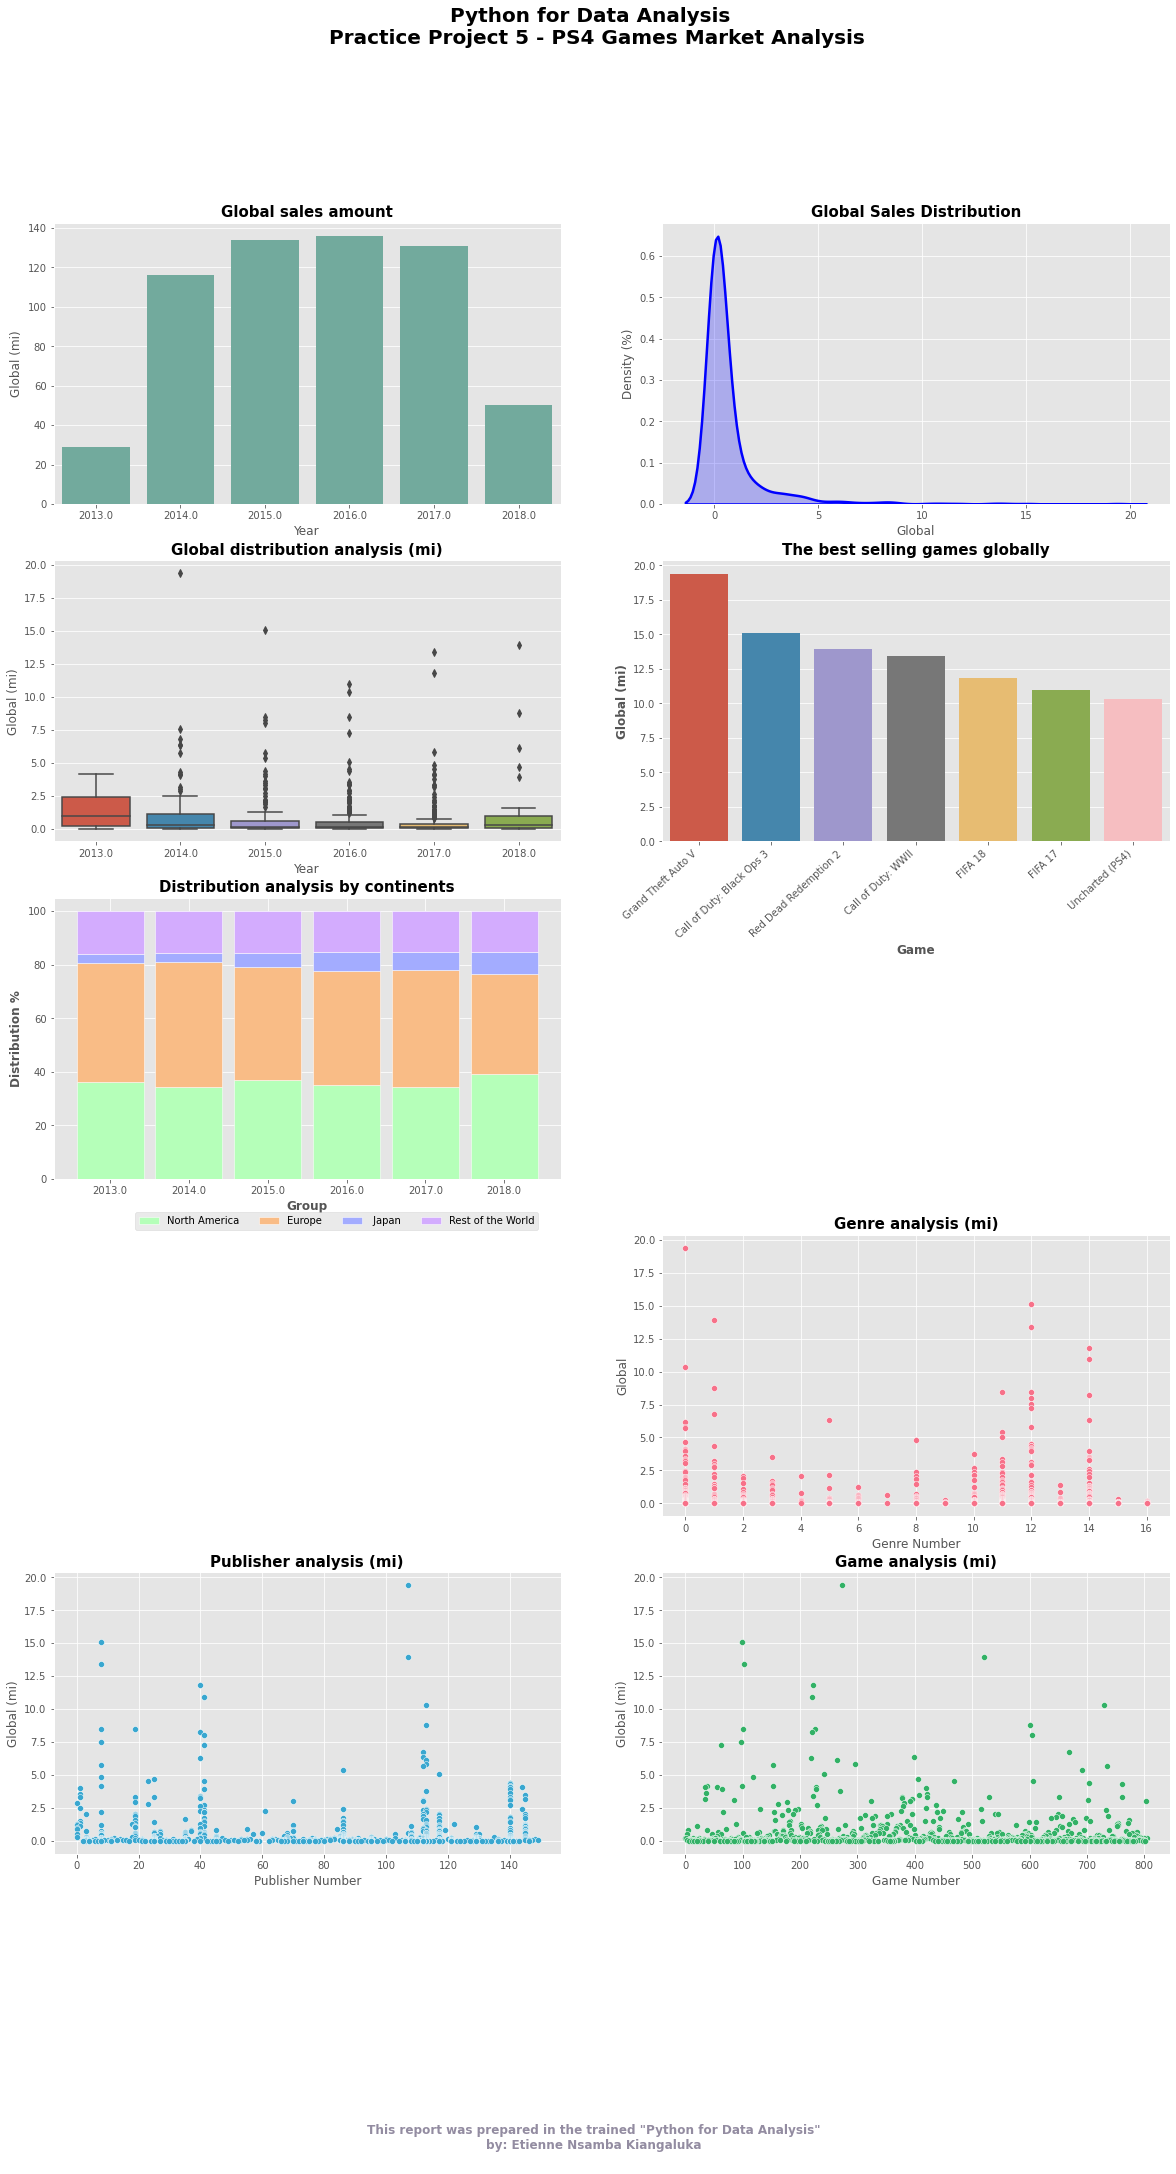

In [29]:
fig, ax = plt.subplots( figsize=(20, 30) )
plt.suptitle('Python for Data Analysis \n Practice Project 5 - PS4 Games Market Analysis', fontsize=20, fontweight=600)


plt.subplot(5,2,1)
plt.title('Global sales amount', fontsize=15, fontweight= 600)
sns.barplot(data = Project, x= 'Year', y='Global', ci=None, color='#69b3a2', estimator = sum)
plt.ylabel('Global (mi)')


plt.subplot(5,2,2)
plt.style.use('ggplot')
plt.title('Global Sales Distribution', fontsize=15, fontweight=600 )
sns.kdeplot(Project['Global'], shade=True, linewidth=2.5, color='blue' )
plt.ylabel('Density (%)')


plt.subplot(5,2,3)
plt.title('Global distribution analysis (mi)', fontsize=15, fontweight=600)
sns.boxplot(data=Project, x='Year', y='Global')
plt.ylabel('Global (mi)')

plt.subplot(5,2,4)
sns.barplot(data= Best_Sellers, x='Game', y='Global')
plt.title('The best selling games globally', fontsize=15, fontweight= 600)
plt.xticks(rotation=43, ha='right')
plt.ylabel('Global (mi)', fontweight=600)
plt.xlabel('Game', fontweight=600)


plt.subplot(5,2,5)
Bar_width = 0.85
Rotulos = Group_analyse['Year']
Groups = [0, 1, 2, 3, 4, 5]
plt.title('Distribution analysis by continents', fontsize= 15, fontweight=600)
plt.bar(Groups, America, width=Bar_width, color='#b5ffb9', edgecolor='white' )
plt.bar(Groups, Europe, bottom=America, width=Bar_width, color='#f9bc86', edgecolor='white' )
plt.bar(Groups, Japan, bottom=[ A + B for A, B in zip(America, Europe) ], width=Bar_width,
        color='#a3acff', edgecolor='white' )
plt.bar(Groups, World, bottom=[ A + B + C for A, B, C in zip(America, Europe, Japan) ], width=Bar_width,
        color='#d3acfe', edgecolor='white' )
plt.xticks( Groups, Rotulos )
plt.xlabel('Group', fontweight=600)
plt.ylabel('Distribution %', fontweight=600)
plt.legend(['North America', 'Europe',' Japan', 'Rest of the World'],
           loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 )


plt.subplot(5,2,8)
plt.title('Genre analysis (mi)', fontsize=15, fontweight=600)
sns.scatterplot(data=Project, x='Genre Number', y='Global', color=Color[0])


plt.subplot(5,2,9)
plt.title('Publisher analysis (mi)', fontsize=15, fontweight=600)
sns.scatterplot(data=Project, x='Publisher Number', y='Global', color=Color[5])
plt.ylabel('Global (mi)')


plt.subplot(5,2,10)
plt.title('Game analysis (mi)', fontsize=15, fontweight=600)
sns.scatterplot(data=Project, x='Game Number', y='Global', color=Color[3])
plt.ylabel('Global (mi)')


Text = '''
This report was prepared in the trained "Python for Data Analysis"
by: Etienne Nsamba Kiangaluka
'''
fig.text( 0.5, -0.02, Text, ha='center', va='bottom', size=12, color='#938ca1', fontweight=600);
